<h1 style="font-family:Times New Roman"> <center>SCRAPING WIKIPEDIA DATA TO OBTAIN COUNTRY CODES </h1>

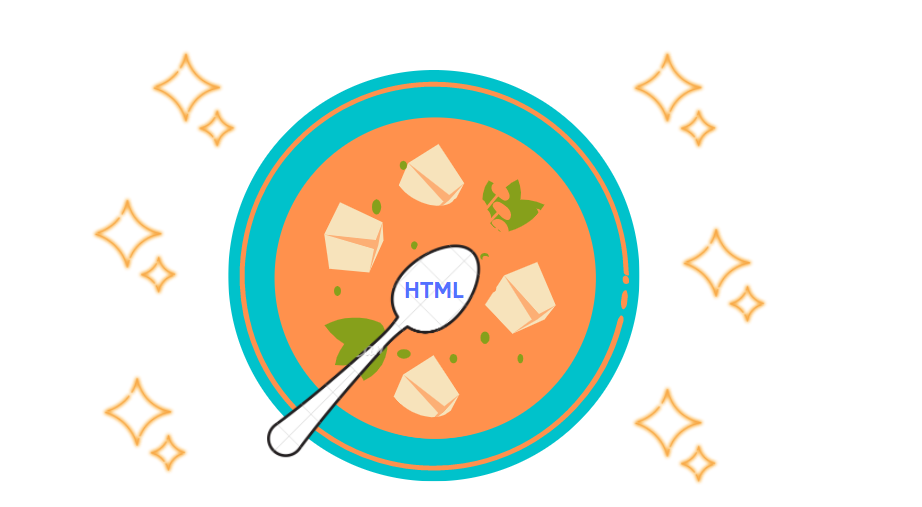

In [26]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import numpy as np

In [2]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [3]:
#status code depicts that we can scrape
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

In [4]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])

In [5]:
df

ISO 3166[1]  \
                                      Country name[5]   
0                                         Afghanistan   
1    Akrotiri and Dhekelia – See United Kingdom, The.   
2                                       Åland Islands   
3                                             Albania   
4                                             Algeria   
..                                                ...   
275                                 Wallis and Futuna   
276                               Western Sahara [ah]   
277                                             Yemen   
278                                            Zambia   
279                                          Zimbabwe   

                                   Unnamed: 1_level_0  \
                               Official state name[6]   
0                 The Islamic Republic of Afghanistan   
1    Akrotiri and Dhekelia – See United Kingdom, The.   
2                                               Åland   
3                             The Republic of Albania   
4         The People's Democratic Republic of Algeria   
..                                                ...   
275    The Territory of the Wallis and Futuna Islands   
276              The Sahrawi Arab Democratic Republic   
277                             The Republic of Yemen   
278                            The Republic of Zambia   
279                          The Republic of Zimbabwe   

                                   Unnamed: 2_level_0  \
                                 Sovereignty[6][7][8]   
0                                     UN member state   
1    Akrotiri and Dhekelia – See United Kingdom, The.   
2                                             Finland   
3                                     UN member state   
4                                     UN member state   
..                                                ...   
275                                            France   
276                                     Disputed [ai]   
277                                   UN member state   
278                                   UN member state   
279                                   UN member state   

                                         ISO 3166-1[2]  \
                                       Alpha-2 code[5]   
0    .mw-parser-output .monospaced{font-family:mono...   
1     Akrotiri and Dhekelia – See United Kingdom, The.   
2                                                   AX   
3                                                   AL   
4                                                   DZ   
..                                                 ...   
275                                                 WF   
276                                                 EH   
277                                                 YE   
278                                                 ZM   
279                                                 ZW   

                                                       \
                                      Alpha-3 code[5]   
0                                                 AFG   
1    Akrotiri and Dhekelia – See United Kingdom, The.   
2                                                 ALA   
3                                                 ALB   
4                                                 DZA   
..                                                ...   
275                                               WLF   
276                                               ESH   
277                                               YEM   
278                                               ZMB   
279                                               ZWE   

                                                       \
                                      Numeric code[5]   
0                                                 004   
1    Akrotiri and Dhekelia – See United Kingdom, The.   
2                                                 248   
3                                 

In [6]:
#let's preprocess the data set we need the country name and the alpha 2 code
df1=df.iloc[:,[0,3]]

In [7]:
df1

,ISO 3166[1],ISO 3166-1[2]
,Country name[5],Alpha-2 code[5]
0,Afghanistan,.mw-parser-output .monospaced{font-family:mono...
1,"Akrotiri and Dhekelia – See United Kingdom, The.","Akrotiri and Dhekelia – See United Kingdom, The."
2,Åland Islands,AX
3,Albania,AL
4,Algeria,DZ
...,...,...
275,Wallis and Futuna,WF
276,Western Sahara [ah],EH
277,Yemen,YE


In [8]:
df1.columns=['Country','Code']
df1

,Country,Code
0,Afghanistan,.mw-parser-output .monospaced{font-family:mono...
1,"Akrotiri and Dhekelia – See United Kingdom, The.","Akrotiri and Dhekelia – See United Kingdom, The."
2,Åland Islands,AX
3,Albania,AL
4,Algeria,DZ
...,...,...
275,Wallis and Futuna,WF
276,Western Sahara [ah],EH
277,Yemen,YE
278,Zambia,ZM


In [9]:
df1['Code'].values

array(['.mw-parser-output .monospaced{font-family:monospace,monospace}AF',
       'Akrotiri and Dhekelia – See United Kingdom, The.', 'AX', 'AL',
       'DZ', 'AS', 'AD', 'AO', 'AI', 'AQ', 'AG', 'AR', 'AM', 'AW',
       'Ashmore and Cartier Islands – See Australia.', 'AU', 'AT', 'AZ',
       'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM', 'BT', 'BO',
       'BQ', 'BA', 'BW', 'BV', 'BR', 'IO',
       'British Virgin Islands – See Virgin Islands (British).', 'BN',
       'BG', 'BF', 'Burma – See Myanmar.', 'BI', 'CV', 'KH', 'CM', 'CA',
       'Cape Verde – See Cabo Verde.',
       'Caribbean Netherlands – See Bonaire, Sint Eustatius and Saba.',
       'KY', 'CF', 'TD', 'CL', 'CN',
       'China, The Republic of – See Taiwan (Province of China).', 'CX',
       'Clipperton Island – See France.', 'CC', 'CO', 'KM', 'CD', 'CG',
       'CK', 'Coral Sea Islands – See Australia.', 'CR', 'CI', 'HR', 'CU',
       'CW', 'CY', 'CZ',
       "Democratic People's Republic of Korea – See Korea, Th

In [10]:
#let's mark the positions of those country codes that have a length equal to 2
pos=[]
non=[]
for x in range(len(df1)):
    if len(str(df1.Code[x]))==2:
        pos.append(x)
    else:
        non.append(x)
        

In [11]:
df_clnd=df1.iloc[pos,:].reset_index(drop=True)

In [12]:
df_clnd

,Country,Code
0,Åland Islands,AX
1,Albania,AL
2,Algeria,DZ
3,American Samoa,AS
4,Andorra,AD
...,...,...
242,Wallis and Futuna,WF
243,Western Sahara [ah],EH
244,Yemen,YE
245,Zambia,ZM


In [13]:
df_rvwd=df1.iloc[non,:].reset_index(drop=True)

In [14]:
df_rvwd['Code'][:1]=df_rvwd.iloc[0]['Code'][-2:]

In [15]:
cc_df=df_clnd.append(df_rvwd[:1]).sort_values(by="Country",ascending=True)

In [16]:
cc_df.reset_index(drop=True,inplace=True)

In [17]:
cc_df

,Country,Code
0,Afghanistan,AF
1,Albania,AL
2,Algeria,DZ
3,American Samoa,AS
4,Andorra,AD
...,...,...
243,Western Sahara [ah],EH
244,Yemen,YE
245,Zambia,ZM
246,Zimbabwe,ZW


In [18]:
cc_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica\u200a[a]', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia\u200a[b]', 'Austria',
       'Azerbaijan', 'Bahamas (the)', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire\xa0Sint Eustatius\xa0Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory (the)',
       'Brunei Darussalam\u200a[e]', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde\u200a[f]', 'Cambodia', 'Cameroon', 'Canada',
       'Cayman Islands (the)', 'Central African Republic (the)', 'Chad',
       'Chile', 'China', 'Christmas Island',
       'Cocos (Keeling) Islands (the)', 'Colombia', 'Comoros (the)',
       'Congo (the Democratic Republic of the)', 'Congo (the)\u200a[g]',
       'Cook Islands (the)', 

In [19]:
df=pd.read_csv("ds_salaries.csv")

In [20]:
df.drop(columns="Unnamed: 0",inplace=True)

In [21]:
list1=list(set(cc_df['Code'].unique()).intersection(set(df.company_location.unique())))

In [22]:
cc_df1=cc_df[cc_df.Code.isin(list1)]

In [23]:
cc_df1

,Country,Code
2,Algeria,DZ
3,American Samoa,AS
12,Australia [b],AU
13,Austria,AT
20,Belgium,BE
30,Brazil,BR
39,Canada,CA
43,Chile,CL
44,China,CN
47,Colombia,CO


In [24]:
cc_df1.duplicated().any()

False

In [31]:
cc_df1['Country']=np.where(cc_df1['Country']=="Viet Nam [ae]","Vietnam",cc_df1['Country'])

<ipython-input-31-ee94db2d9930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df1['Country']=np.where(cc_df1['Country']=="Viet Nam [ae]","Vietnam",cc_df1['Country'])


In [32]:
cc_df1

,Country,Code
2,Algeria,DZ
3,American Samoa,AS
12,Australia [b],AU
13,Austria,AT
20,Belgium,BE
30,Brazil,BR
39,Canada,CA
43,Chile,CL
44,China,CN
47,Colombia,CO


In [33]:
cc_df1['Country']=np.where(cc_df1['Country']=="Czechia [i]","Czech Republic",cc_df1['Country'])
cc_df1['Country']=np.where(cc_df1['Country']=="Australia [b]","Australia",cc_df1['Country'])
cc_df1['Country']=np.where(cc_df1['Country']=="France [l]","France",cc_df1['Country'])
cc_df1['Country']=np.where(cc_df1['Country']=="Russia Russian Federation (the) [v]","Russia",cc_df1['Country'])
cc_df1['Country']=np.where(cc_df1['Country']=="United States of America (the)","The United States of America",cc_df1['Country'])
cc_df1['Country']=np.where(cc_df1['Country']=="United Arab Emirates (the)","The United Arab Emirates",cc_df1['Country'])
cc_df1

<ipython-input-33-c47398821e25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df1['Country']=np.where(cc_df1['Country']=="Czechia [i]","Czech Republic",cc_df1['Country'])
<ipython-input-33-c47398821e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df1['Country']=np.where(cc_df1['Country']=="Australia [b]","Australia",cc_df1['Country'])
<ipython-input-33-c47398821e25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,Country,Code
2,Algeria,DZ
3,American Samoa,AS
12,Australia,AU
13,Austria,AT
20,Belgium,BE
30,Brazil,BR
39,Canada,CA
43,Chile,CL
44,China,CN
47,Colombia,CO


In [35]:
cc_df1['Country']=np.where(cc_df1['Country']=="Türkiye","Turkey",cc_df1['Country'])

<ipython-input-35-7673eb0002fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_df1['Country']=np.where(cc_df1['Country']=="Türkiye","Turkey",cc_df1['Country'])


In [37]:
cc_df1.reset_index(inplace=True,drop=True)
cc_df1.head()

,Country,Code
0,Algeria,DZ
1,American Samoa,AS
2,Australia,AU
3,Austria,AT
4,Belgium,BE


In [39]:
df_final=pd.merge(df,cc_df1,how='inner',left_on="company_location",right_on='Code')

In [41]:
df_final['company_location']=df_final['Country']
df_final.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country,Code
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,Germany,L,Germany,DE
1,2020,MI,FT,Data Engineering Manager,51999,EUR,59303,DE,100,Germany,S,Germany,DE
2,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,Germany,S,Germany,DE
3,2020,EN,FT,Data Engineer,48000,EUR,54742,PK,100,Germany,L,Germany,DE
4,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,100,Germany,M,Germany,DE


In [42]:
df_final.drop(columns=['Country','Code'],inplace=True)

In [43]:
df_final

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,Germany,L
1,2020,MI,FT,Data Engineering Manager,51999,EUR,59303,DE,100,Germany,S
2,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,Germany,S
3,2020,EN,FT,Data Engineer,48000,EUR,54742,PK,100,Germany,L
4,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,100,Germany,M
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,EN,FT,Data Scientist,40000,USD,40000,JP,100,Malaysia,L
603,2022,MI,FT,Machine Learning Engineer,121000,AUD,87425,AU,100,Australia,L
604,2022,EN,FT,Data Scientist,120000,AUD,86703,AU,50,Australia,M
605,2022,EN,FT,Computer Vision Software Engineer,150000,USD,150000,AU,100,Australia,S


In [44]:
df_final=pd.merge(df_final,cc_df1,how='inner',left_on="employee_residence",right_on='Code')

In [45]:
df_final['employee_residence']=df_final['Country']
df_final.drop(columns=['Country','Code'],inplace=True)

In [46]:
df_final

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,Germany,0,Germany,L
1,2020,MI,FT,Data Engineering Manager,51999,EUR,59303,Germany,100,Germany,S
2,2020,EN,PT,ML Engineer,14000,EUR,15966,Germany,100,Germany,S
3,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,Germany,100,Germany,M
4,2020,EN,FT,Data Scientist,55000,EUR,62726,Germany,50,Germany,S
...,...,...,...,...,...,...,...,...,...,...,...
593,2022,MI,FT,Head of Data,30000,EUR,32974,Estonia,100,Estonia,S
594,2022,MI,FT,Machine Learning Engineer,121000,AUD,87425,Australia,100,Australia,L
595,2022,EN,FT,Data Scientist,120000,AUD,86703,Australia,50,Australia,M
596,2022,EN,FT,Computer Vision Software Engineer,150000,USD,150000,Australia,100,Australia,S


In [47]:
#a feature that identifies if the employee stays in the same country or not
def local(row):
    residence=row[0]
    office=row[1]
    if office==residence:
        return 1
    else:
        return 0
    

In [48]:
df_final['local']=df_final[['employee_residence','company_location']].apply(local,axis='columns')

In [49]:
df_final['local'].value_counts()

1    556
0     42
Name: local, dtype: int64

In [51]:
#a feature to distinguish jobs in India and abroad
df_final['abroad']=np.where(df_final['salary_currency']=='INR',0,1)

In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           598 non-null    int64 
 1   experience_level    598 non-null    object
 2   employment_type     598 non-null    object
 3   job_title           598 non-null    object
 4   salary              598 non-null    int64 
 5   salary_currency     598 non-null    object
 6   salary_in_usd       598 non-null    int64 
 7   employee_residence  598 non-null    object
 8   remote_ratio        598 non-null    int64 
 9   company_location    598 non-null    object
 10  company_size        598 non-null    object
 11  local               598 non-null    int64 
 12  abroad              598 non-null    int32 
dtypes: int32(1), int64(5), object(7)
memory usage: 63.1+ KB


In [53]:
df_final.to_csv('ds_sal_scraped_cleaned_data.csv')

In [54]:
cc_df1.to_csv('wikipedia_cc_data.csv')